In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plot
import numpy as np

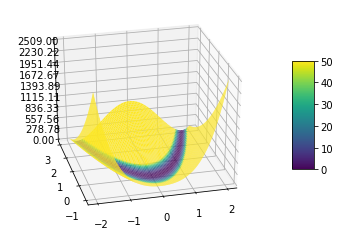

In [2]:
fig = plot.figure()
ax = fig.gca(projection='3d')

s = 0.05   # Try s=1, 0.25, 0.1, or 0.05
X = np.arange(-2, 2.+s, s)   #Could use linspace instead if dividing
Y = np.arange(-1, 3.+s, s)   #evenly instead of stepping...
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = (1.-X)**2 + 100.*(Y-X*X)**2

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis,
         linewidth=0, antialiased=True, vmin=0, vmax=50)  #Try coolwarm vs jet

 
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 256)
#Displays the figure, handles user interface, returns when user closes window
plot.show()

In [3]:
from krr import nelder_mead

In [17]:
ip = [[-2., -1.],[1., 3.], [-1., 2.], [2., 2.], [0., 0.], [1.5, 2]]
rsbrock = lambda x: (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

In [18]:
mae = []
for i in ip:
    st, se = nelder_mead.minimize(function=rsbrock,
                  x0=np.array(i),
                  n_iters=250)
    mae.append(se)
        

  0%|          | 0/250 [00:00<?, ?it/s]

2509.0
1891.3999999999999
1805.5999999999995
1346.319999999999
1274.1199999999992
942.1199999999993
881.9199999999989
649.9999999999991
600.1999999999994
444.9999999999993
403.9999999999993
305.9999999999995
272.1999999999995
215.71999999999963
187.5199999999996
160.71999999999974
136.51999999999973
131.39999999999986
109.59999999999988
109.59999999999988
101.0
89.79999999999986
81.99999999999999
71.99999999999986
64.99999999999997
56.19999999999986
49.99999999999996
42.39999999999987
36.99999999999996
30.599999999999884
25.999999999999954
20.799999999999894
16.999999999999957
12.999999999999911
9.99999999999996
7.199999999999931
4.999999999999968
3.399999999999956
1.9999999999999805
1.5999999999999839
0.9999999999999964
0.9999999999999964
0.9999999999999964
0.799999999999996
0.799999999999996
0.7819140624999992
0.7151222229003871
0.6004371643066375
0.6004371643066375
0.6004371643066375
0.5494443333521459
0.5494443333521459
0.5262790767221277
0.5099371820688229
0.4811289548502805
0.481

100%|██████████| 250/250 [00:00<00:00, 5046.74it/s]

0.9900250625
0.9900250625
0.9827009999999999
0.980101
0.9729550625
0.9702300625
0.963316
0.9604159999999999
0.9537890625
0.9506640624999999
0.9443809999999999
0.940981
0.9351000625
0.9313750625000002
0.9259560000000002
0.9218560000000002
0.9169600625000001
0.9124350625000001
0.9081250000000001
0.9031250000000001
0.8994650625
0.8939400625
0.8909960000000001
0.8848960000000001
0.8827350625000001
0.8760100625000001
0.8747010000000003
0.8673010000000003
0.8669140625000002
0.8587890625000003
0.8587890625000003
0.8504960000000003
0.8504960000000003
0.8465960000000005
0.8424450625000004
0.8377200625000004
0.8346610000000004
0.8290610000000005
0.8271700625000004
0.8206450625000006
0.8200000000000005
0.8125000000000006
0.8125000000000006
0.8046550625000005
0.8046550625000005
0.8011300625000009
0.7971410000000007
0.7925410000000007
0.7899900625000007
0.7842650625000007
0.7832360000000005
0.7763360000000009
0.7763360000000009
0.7687890625000009
0.7687890625000009
0.765664062500001
0.7616610000000

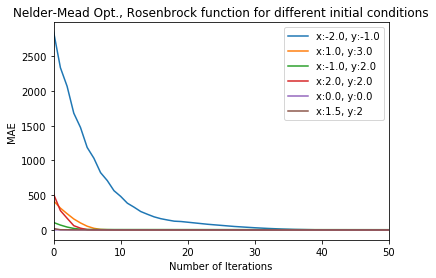

In [27]:
for m, l in zip(mae, ip):
    plot.plot(np.arange(len(m)), m, label=f'x:{l[0]}, y:{l[1]}')
plot.xlim([0,50])
plot.legend()
plot.xlabel('Number of Iterations')
plot.ylabel('MAE')
plot.title('Nelder-Mead Opt., Rosenbrock function for different initial conditions')
plot.savefig('nelder_mead_rosenbrock.png', dpi=300)